In [1]:
import h3
import util as u

def show_gj_str(gj_str):
    import json
    from IPython.display import GeoJSON
    
    return GeoJSON(json.loads(gj_str))

In [2]:
lat, lng = 37.7749, -122.4194
h = h3.latlng_to_cell(lat,lng,9)

cells = h3.grid_ring(h, 6) | h3.grid_ring(h, 3)

In [3]:
polys = h3.cells_to_polygons(cells)

In [4]:
polys

[<H3Poly |outer|=78, |holes|=(66,)>, <H3Poly |outer|=42, |holes|=(30,)>]

In [5]:
h3.polygons_to_cells(polys, 9) == cells

True

In [6]:
cells = h3.polygons_to_cells(polys, 9)

In [7]:
gjs = u.cells_to_geojson(cells)

In [8]:
print(gjs[:100])

{"type": "MultiPolygon", "coordinates": [[[[-122.44119972888005, 37.765357658791245], [-122.43994011


In [9]:
show_gj_str(gjs)

<IPython.display.GeoJSON object>

In [10]:
set(u.geojson_to_cells(gjs,9)) == cells

True

# example

In [11]:
import geopandas as gpd
import shapely

path = gpd.datasets.get_path('nybb')
df = gpd.read_file(path).to_crs(epsg=4326)

# finding largest polygon in multipolygon
polygon = max(df.loc[0, "geometry"].geoms, key=lambda a: a.area)
assert isinstance(polygon, shapely.geometry.polygon.Polygon)

In [12]:
df

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [13]:
str(df.loc[0, "geometry"])[:100]

'MULTIPOLYGON (((-74.05050806403247 40.566422034161015, -74.05047137128544 40.56641738793831, -74.050'

In [14]:
a = df.loc[0, "geometry"].geoms
len(a)

4

In [15]:
str(a[0])

'POLYGON ((-74.05050806403247 40.566422034161015, -74.05047137128544 40.56641738793831, -74.05030321271761 40.566417461703345, -74.05012587375454 40.5664058803353, -74.04998352562573 40.566395924928464, -74.04931640362085 40.565887747780614, -74.04923629842045 40.56536273636829, -74.05002620158642 40.56531818062134, -74.05074409977213 40.56588712593522, -74.05074768943298 40.565954076754075, -74.05073223954277 40.56599211952051, -74.05073571037052 40.56603277459598, -74.05080326895582 40.566052200461336, -74.05087333045633 40.566081240210075, -74.05090601705088 40.5660943421308, -74.05091292519015 40.56613368475736, -74.05088200371617 40.566178290004316, -74.05085250143459 40.56618955570346, -74.05083386287333 40.566196673578524, -74.05076507357134 40.56619932634305, -74.05070831606588 40.566194105556065, -74.05068769619591 40.56621772277345, -74.0506825519483 40.56623739755228, -74.05068257682464 40.566270185949534, -74.05067916748612 40.56631084573659, -74.05069640316088 40.566360675

In [16]:
type(a[0])

shapely.geometry.polygon.Polygon

In [17]:
polygon = max(df.loc[0, "geometry"].geoms, key=lambda a: a.area)

In [18]:
type(polygon)

shapely.geometry.polygon.Polygon

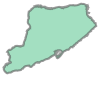

In [19]:
polygon

In [20]:
str(polygon)[:100]

'POLYGON ((-74.08221272914936 40.64828016229027, -74.0821239438788 40.648278112186176, -74.0820462949'

In [21]:
print(str(df.loc[0, "geometry"].__geo_interface__)[:200])

{'type': 'MultiPolygon', 'coordinates': [(((-74.05050806403247, 40.566422034161015), (-74.05047137128544, 40.56641738793831), (-74.05030321271761, 40.566417461703345), (-74.05012587375454, 40.56640588


In [22]:
print(str(polygon.__geo_interface__)[:200])

{'type': 'Polygon', 'coordinates': (((-74.08221272914936, 40.64828016229027), (-74.0821239438788, 40.648278112186176), (-74.08204629493247, 40.64830775311529), (-74.08186603545586, 40.64837339135739),


In [23]:
import h3

h3_poly = h3.Polygon(polygon)
assert isinstance(h3_poly, h3.Polygon)

In [24]:
type(h3_poly.outer)

shapely.geometry.polygon.Polygon

In [25]:
h3_poly

TypeError: object of type 'Polygon' has no len()

In [26]:
# raises "TypeError: object of type 'Polygon' has no len()"
h3.polygon_to_cells(h3_poly, 9) 

TypeError: object of type 'Polygon' has no len()